### 1. Importing Libraries 

In [66]:
import pandas as pd
import numpy as np
import re
import nltk

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from textblob import TextBlob

### 2. Load Data 

In [67]:
rawData = pd.read_csv('../Dataset/data.csv')

In [68]:
# Display first 5 rows of rawData
rawData.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


#### 2.1 Filter Data 

In [69]:
# Filter data to only include videos from Gaming Category(20)
gamingData = rawData[rawData["categoryId"]==20]

In [70]:
# Reset the Gaming Dataset index to start from 0
gamingData = gamingData.reset_index(drop=True)

# Display first 5 rows of Gaming Dataset
gamingData.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
1,I6hswz4rIrU,Rainbow Six Siege: Operation Shadow Legacy Rev...,2020-08-11T17:13:53Z,UCBMvc6jvuTxH6TNo9ThpYjg,Ubisoft North America,20,2020-08-12T00:00:00Z,R6|R6S|Siege|New Siege|New Operators|New Ops|G...,320872,14288,774,2085,https://i.ytimg.com/vi/I6hswz4rIrU/default.jpg,False,False,“Prepare. Execute. Vanish”Sam Fisher joins Tea...
2,xTpr7piQu2M,FUT 21 | Official Trailer,2020-08-10T15:00:08Z,UCoyaxd5LQSuP4ChkxK0pnZQ,EA SPORTS FIFA,20,2020-08-12T00:00:00Z,Fifa|fifa 21|fifa21|fifa 21 trailer|fifa 21 ne...,1213314,64247,7181,5438,https://i.ytimg.com/vi/xTpr7piQu2M/default.jpg,False,False,"Play with friends, customise your stadium, and..."
3,AG9qDVXEemc,CASH NASTY MADE A MISTAKE CHALLENGING ME TO TH...,2020-08-10T17:57:08Z,UCVC5-Y6ez4sk3mtbUmN-SUQ,Agent 00,20,2020-08-12T00:00:00Z,agent 00|cashnasty|1v1 basketball,480485,30207,391,2967,https://i.ytimg.com/vi/AG9qDVXEemc/default.jpg,False,False,Came in there with one mission. Win the 1v1 vs...
4,ysdw7cmigZM,"Game Theory: Minecraft, Stop Using Diamonds!",2020-08-08T18:05:14Z,UCo_IB5145EVNcf8hw1Kku7w,The Game Theorists,20,2020-08-12T00:00:00Z,minecraft|minecraft theory|minecraft diamonds|...,2657891,154064,6509,21993,https://i.ytimg.com/vi/ysdw7cmigZM/default.jpg,False,False,Thanks Honey for sponsoring! Get the best dea...


### 3. Text Analytics on Title Column

In [71]:
# Create a dataframe consisting of all the titles from the previous Dataframe
titleDF = gamingData[["title"]].copy()

In [72]:
# Display the first 5 rows of titles
titleDF.head()

,title
0,Apex Legends | Stories from the Outlands – “Th...
1,Rainbow Six Siege: Operation Shadow Legacy Rev...
2,FUT 21 | Official Trailer
3,CASH NASTY MADE A MISTAKE CHALLENGING ME TO TH...
4,"Game Theory: Minecraft, Stop Using Diamonds!"


In [73]:
# Display the title in the first row
titleDF["title"][0]

'Apex Legends | Stories from the Outlands – “The Endorsement”'

#### 3.1 Cleanse text in Title Column 

In [74]:
def pre_process(text):
      
    #remove tags
    text=re.sub("</?.*?>"," <> ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W|_)+"," ",text)
    
    # lowercase
    text=text.lower()

    return text

def get_stop_words(stop_file_path):
        
    with open(stop_file_path, 'r', encoding="utf-8") as f:
        stopwords = f.readlines()
        stop_set = set(m.strip() for m in stopwords)
        return frozenset(stop_set)

#load a set of stop words
stopwords=get_stop_words("../Dataset/stopwords.txt")

text_all = titleDF["title"].apply(lambda x:pre_process(x))


In [75]:
# Display text after pre-processing
text_all[0]

'apex legends stories from the outlands the endorsement '

In [76]:
#create a vocabulary of words, 
#ignore words that appear in 15% of text in all rows, 
#eliminate stop words

count_vect = CountVectorizer(max_df=0.15, stop_words=stopwords, max_features=5000)
title_counts = count_vect.fit_transform(text_all.tolist())

In [77]:
feature_names=np.array(count_vect.get_feature_names_out())
len(count_vect.get_feature_names_out())

5000

#### 3.2 TF-IDF to sort words

In [78]:
tfidf_transformer=TfidfTransformer(use_idf=True, smooth_idf=True)
reviews_tfidf = tfidf_transformer.fit_transform(title_counts)

In [79]:
sorted_by_idf = np.argsort(tfidf_transformer.idf_)
print("Features with lowest idf:\n{}".format(
       feature_names[sorted_by_idf[:100]]))

Features with lowest idf:
['trailer' 'fortnite' 'season' 'game' 'official' 'hardcore' 'days'
 'update' 'legends' 'vs' 'survived' 'gameplay' 'mod' 'world' 'hermitcraft'
 'shorts' 'chapter' 'episode' 'reveal' 'clash' 'night' 'pokémon' 'apex'
 'gta' 'video' 'challenge' 'friday' 'battle' 'teaser' 'royale' 'elden'
 'funkin' 'ring' 'smp' 'war' 'theory' 'life' 'dream' 'beat' 'ep' 'genshin'
 'impact' 'nintendo' 'fnaf' 'event' 'ps' 'pokemon' 'story' 'games'
 'roblox' 'league' 'security' 'announcement' 'mario' 'secret' 'breach'
 'insane' 'clans' 'call' 'poppy' 'ft' 'playtime' 'nba' 'animation' 'play'
 'warzone' 'duty' 'switch' 'super' 'dead' 'happened' 'item' 'final'
 'destiny' 'player' 'live' 'character' 'skin' 'build' 'built' 'hours'
 'pass' 'custom' 'manhunt' 'dragon' 'ultimate' 'myths' 'cinematic'
 'review' 'players' 'real' 'house' 'friends' 'map' 'launch' 'star'
 'played' 'day' 'daylight' 'guide']


In [80]:
# find maximum value for each of the features over dataset:
max_value = reviews_tfidf.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()

print("Features with lowest tfidf:\n{}".format(
      feature_names[sorted_by_tfidf[:20]]))

print("Features with highest tfidf: \n{}".format(
      feature_names[sorted_by_tfidf[-20:]]))

Features with lowest tfidf:
['actives' 'attacks' 'ssg' 'intros' 'premium' 'psp' 'symbiote' 'insanity'
 'rivers' 'colossal' 'kent' 'sumer' 'brutus' 'jstn' 'squishy' 'sizz'
 'garrettg' 'starring' 'seraphine' 'liu']
Features with highest tfidf: 
['game' 'games' 'days' 'announcement' 'omg' 'believe' 'bees' 'updates'
 'upside' 'beat' 'useless' 'date' 'battlefield' 'goodbye' 'google'
 'googled' 've' 'shorts' 'clearing' 'kill']


#### 3.3 Extract Keywords

In [81]:
# No.of keywords to extract
topn = 5
results =[]

In [82]:
from unittest import result

for idx, doc in text_all.items():
    #generate tf-idf for the given document
    tf_idf_vector=reviews_tfidf[idx]
    
    temp = pd.DataFrame(zip(tf_idf_vector.tocoo().col, tf_idf_vector.tocoo().data),columns=['feature_number','tf_idf'])
    temp.sort_values('tf_idf', ascending = False, inplace = True)
    
    #use only topn items from vector
     
    topn_items = temp[:topn]

    tf_idf = []
    word = []

    for index, row in topn_items.iterrows():
        #print(int(row['feature_number']))
        fname = feature_names[int(row['feature_number'])]
        word.append(fname)
        #tf_idf.append(round(row['tf_idf'], 3))

    #result = dict(zip(word, tf_idf))
    result = word
    
    results.append(result)

In [83]:
titleDF['cleansed_text'] = text_all
titleDF['keywords'] = results
titleDF.head()

,title,cleansed_text,keywords
0,Apex Legends | Stories from the Outlands – “Th...,apex legends stories from the outlands the end...,"[endorsement, outlands, stories, apex, legends]"
1,Rainbow Six Siege: Operation Shadow Legacy Rev...,rainbow six siege operation shadow legacy reve...,"[shadow, operation, ubisoft, legacy, na]"
2,FUT 21 | Official Trailer,fut official trailer,"[fut, official, trailer]"
3,CASH NASTY MADE A MISTAKE CHALLENGING ME TO TH...,cash nasty made a mistake challenging me to th...,"[nasty, challenging, cash, mistake, agent]"
4,"Game Theory: Minecraft, Stop Using Diamonds!",game theory minecraft stop using diamonds,"[stop, diamonds, using, theory, game]"


In [84]:
# Copy keywords from title column to a DataFrame
keywordDF = titleDF[["keywords"]].copy()

In [85]:
keywordDF.head()

,keywords
0,"[endorsement, outlands, stories, apex, legends]"
1,"[shadow, operation, ubisoft, legacy, na]"
2,"[fut, official, trailer]"
3,"[nasty, challenging, cash, mistake, agent]"
4,"[stop, diamonds, using, theory, game]"


In [86]:
# Keywords from title column of first Video
keywordDF["keywords"][0]

['endorsement', 'outlands', 'stories', 'apex', 'legends']

### 4. Text Analytics on Description Column

In [87]:
descriptionDF = gamingData[["description"]].copy()

In [88]:
descriptionDF.head()

,description
0,"While running her own modding shop, Ramya Pare..."
1,“Prepare. Execute. Vanish”Sam Fisher joins Tea...
2,"Play with friends, customise your stadium, and..."
3,Came in there with one mission. Win the 1v1 vs...
4,Thanks Honey for sponsoring! Get the best dea...


In [89]:
descriptionDF["description"][0]

'While running her own modding shop, Ramya Parekh (aka Rampart) built her rep in underground gauntlet circuits. But success has a way of making enemies. Good thing she knows how to use all those fancy weapons she’s upgraded…  Apex Legends™ is a free-to-play battle royale game where legendary characters battle for glory, fame, and fortune on the fringes of the Frontier. Play for free now on Xbox One, PS4, and Origin for PC. Learn more about Apex Legends Season 6 – Boosted: http://x.ea.com/64060 Check out our YouTube channel: http://x.ea.com/56710.Follow us on Twitter: https://twitter.com/playapex.Follow us on Instagram: https://www.instagram.com/playapex/.#MeetRampart #ApexSeason6 #ApexSeasonSix #ApexLegends'

In [90]:
descriptionDF["description"] = descriptionDF["description"].astype(str)

#### 4.1 Cleanse Text in Description Column

In [91]:
text_description = (descriptionDF["description"].apply(lambda x:pre_process(x)))

In [92]:
text_description[0]

'while running her own modding shop ramya parekh aka rampart built her rep in underground gauntlet circuits but success has a way of making enemies good thing she knows how to use all those fancy weapons she s upgraded apex legends is a free to play battle royale game where legendary characters battle for glory fame and fortune on the fringes of the frontier play for free now on xbox one ps and origin for pc learn more about apex legends season boosted http x ea com check out our youtube channel http x ea com follow us on twitter https twitter com playapex follow us on instagram https www instagram com playapex meetrampart apexseason apexseasonsix apexlegends'

In [93]:
#create a vocabulary of words, 
#ignore words that appear in 15% of text in all rows, 
#eliminate stop words

count_vect = CountVectorizer(max_df=0.15, stop_words=stopwords, max_features=5000)
description_counts = count_vect.fit_transform(text_description.tolist())

In [94]:
feature_names=np.array(count_vect.get_feature_names_out())
len(count_vect.get_feature_names_out())

5000

#### 4.2 TF-IDF to sort words

In [95]:
tfidf_transformer=TfidfTransformer(use_idf=True, smooth_idf=True)
description_tfidf = tfidf_transformer.fit_transform(description_counts)

In [96]:
sorted_by_idf = np.argsort(tfidf_transformer.idf_)
print("Features with lowest idf:\n{}".format(
       feature_names[sorted_by_idf[:100]]))

Features with lowest idf:
['videos' 'check' 'world' 'games' 'server' 'code' 'time' 'youtu' 'user'
 'store' 'series' 'live' 'content' 'friends' 'support' 'thanks' 'download'
 'battle' 'patreon' 'sub' 'challenge' 'll' 'season' 'list' 'en' 'enjoy'
 'link' 'fortnite' 're' 'official' 'players' 'shop' 'update' 'fun'
 'please' 'gaming' 'reddit' 'gameplay' 'epidemic' 'co' 'socials' 'mod'
 'own' 'pc' 'don' 'challenges' 'day' 'epic' 'days' 'try' 'episode'
 'epidemicsound' 'thank' 'build' 'creator' 'special' 'confirmation'
 'learn' 'share' 'watching' 'gl' 'shorts' 'website' 'map' 'goo' 'social'
 'visit' 'stream' 'features' 'help' 'future' 'hardcore' 'team' 'playlist'
 'news' 'edited' 'items' 'dream' 'enjoyed' 'love' 'click' 'xbox'
 'available' 'player' 've' 'real' 'editor' 'family' 'app' 'community'
 'net' 'coming' 'business' 'royale' 'life' 'thumbnail' 'super' 'links'
 'sound' 'experience']


In [97]:
# find maximum value for each of the features over dataset:
max_value = description_tfidf.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()

print("Features with lowest tfidf:\n{}".format(
      feature_names[sorted_by_tfidf[:20]]))

print("Features with highest tfidf: \n{}".format(
      feature_names[sorted_by_tfidf[-20:]]))

Features with lowest tfidf:
['joggers' 'rrsg' 'usmzxi' 'ruulo' 'mztyhwcmhr' 'mztyhvifsasiau'
 'mztyhxstvqdhddu' 'mztyhxxwlva' 'mztyhxl' 'apokemon'
 'clfbjaznbpvhyhzlpokemon' 'mztyhuikfuatmbqogbt' 'qccr' 'dbreath' 'knr'
 'steezo' 'rowdiest' 'brawlerscollect' 'evolvinglook' 'passcomplete']
Features with highest tfidf: 
['trollin' 'animation' 'smashbros' 'audio' 'panda' 'technoblade'
 'technothepig' 'haha' 'comments' 'rich' 'chat' 'shorts' 'nd' 'short'
 'nba' 'player' 'thank' 'nan' 'fuse' 'videos']


#### 4.3 Extract Keywords

In [98]:
# No. of keywords to extract
topn = 10
results =[]

In [99]:
for idx, doc in text_all.items():
    #generate tf-idf for the given document
    tf_idf_vector=description_tfidf[idx]
    
    temp = pd.DataFrame(zip(tf_idf_vector.tocoo().col, tf_idf_vector.tocoo().data),columns=['feature_number','tf_idf'])
    temp.sort_values('tf_idf', ascending = False, inplace = True)
    
    #use only topn items from vector
     
    topn_items = temp[:topn]

    tf_idf = []
    word = []

    for index, row in topn_items.iterrows():
        
        fname = feature_names[int(row['feature_number'])]
        word.append(fname)
        #tf_idf.append(round(row['tf_idf'], 3))

    #result = dict(zip(word, tf_idf))
    result = word
    
    results.append(result)

In [100]:
descriptionDF['cleansed_text'] = text_description
descriptionDF['description_keywords'] = results
descriptionDF.head()

,description,cleansed_text,description_keywords
0,"While running her own modding shop, Ramya Pare...",while running her own modding shop ramya parek...,"[playapex, apex, ea, legends, rampart, modding..."
1,“Prepare. Execute. Vanish”Sam Fisher joins Tea...,prepare execute vanish sam fisher joins team ...,"[rainbow, ubisoft, siege, six, combat, versus,..."
2,"Play with friends, customise your stadium, and...",play with friends customise your stadium and t...,"[fifa, ea, team, ultimate, playstation, xbox, ..."
3,Came in there with one mission. Win the 1v1 vs...,came in there with one mission win the v vs ca...,"[cash, confirmation, sub, vs, nasty, callmeage..."
4,Thanks Honey for sponsoring! Get the best dea...,thanks honey for sponsoring get the best deals...,"[diamond, youtu, theory, diamonds, editor, die..."


In [101]:
keyword_descriptionDF = descriptionDF[["description_keywords"]].copy()

In [102]:
keyword_descriptionDF.head()

,description_keywords
0,"[playapex, apex, ea, legends, rampart, modding..."
1,"[rainbow, ubisoft, siege, six, combat, versus,..."
2,"[fifa, ea, team, ultimate, playstation, xbox, ..."
3,"[cash, confirmation, sub, vs, nasty, callmeage..."
4,"[diamond, youtu, theory, diamonds, editor, die..."


In [103]:
keyword_descriptionDF["description_keywords"][0]

['playapex',
 'apex',
 'ea',
 'legends',
 'rampart',
 'modding',
 'success',
 'boosted',
 'battle',
 'underground']

### 5. Combine Keywords from Title and Description Column

In [104]:
keyword_descriptionDF["title_keywords"] = keywordDF["keywords"]
keyword_descriptionDF.head()

,description_keywords,title_keywords
0,"[playapex, apex, ea, legends, rampart, modding...","[endorsement, outlands, stories, apex, legends]"
1,"[rainbow, ubisoft, siege, six, combat, versus,...","[shadow, operation, ubisoft, legacy, na]"
2,"[fifa, ea, team, ultimate, playstation, xbox, ...","[fut, official, trailer]"
3,"[cash, confirmation, sub, vs, nasty, callmeage...","[nasty, challenging, cash, mistake, agent]"
4,"[diamond, youtu, theory, diamonds, editor, die...","[stop, diamonds, using, theory, game]"


In [105]:
# Merge Lists
keyword_descriptionDF["compiled_keywords"] = keyword_descriptionDF["description_keywords"] + keyword_descriptionDF["title_keywords"]

In [106]:
# Remove duplicates
keyword_descriptionDF["compiled_keywords"] = keyword_descriptionDF["compiled_keywords"].apply(lambda x: list(set(x)))

#### 5.1 Polarity Score of each video based on Keywords

In [107]:
# transform keyword list into one string of words
keyword_descriptionDF['compliedKeywords_str'] = keyword_descriptionDF["compiled_keywords"].apply(lambda x: ' '.join(map(str, x)))

# find the polarity_score of each video
keyword_descriptionDF['polarity_Score'] = keyword_descriptionDF["compliedKeywords_str"].apply(lambda x: TextBlob(x).polarity)


In [108]:
keyword_descriptionDF

,description_keywords,title_keywords,compiled_keywords,compliedKeywords_str,polarity_Score
0,"[playapex, apex, ea, legends, rampart, modding...","[endorsement, outlands, stories, apex, legends]","[ea, boosted, battle, legends, playapex, under...",ea boosted battle legends playapex underground...,0.300000
1,"[rainbow, ubisoft, siege, six, combat, versus,...","[shadow, operation, ubisoft, legacy, na]","[six, siege, combat, legacy, destruction, terr...",six siege combat legacy destruction terrorist ...,0.000000
2,"[fifa, ea, team, ultimate, playstation, xbox, ...","[fut, official, trailer]","[ea, official, vd, trailer, fifa, ultimate, te...",ea official vd trailer fifa ultimate team play...,0.000000
3,"[cash, confirmation, sub, vs, nasty, callmeage...","[nasty, challenging, cash, mistake, agent]","[ernlg, cash, agent, sub, nasty, ucpmgbhqhg, c...",ernlg cash agent sub nasty ucpmgbhqhg cskj cha...,-0.250000
4,"[diamond, youtu, theory, diamonds, editor, die...","[stop, diamonds, using, theory, game]","[theory, using, fx, youtu, lee, diamonds, stop...",theory using fx youtu lee diamonds stop died g...,-0.400000
...,...,...,...,...,...
29283,"[alpharad, nova, pleasebuymymerch, emerald, du...","[physics, ice, entire, pokémon, game]","[art, duke, cannons, physics, pleasebuymymerch...",art duke cannons physics pleasebuymymerch enti...,-0.200000
29284,"[gamestop, kratos, subscription, god, combat, ...","[combat, ragnarök, food, exclusive, god]","[kratos, god, combat, shared, subscription, ga...",kratos god combat shared subscription gamestop...,0.300000
29285,"[amustycow, musty, comhttps, gfuel, tx, colors...","[freestyle, rocket, insane, league, challenge]","[rocket, partner, insane, comhttps, amustycow,...",rocket partner insane comhttps amustycow musty...,-1.000000
29286,"[itunes, geo, ct, album, bb, boys, qd, apple, ...","[boys, backrooms, visit]","[spotify, visit, itunes, bb, qd, album, single...",spotify visit itunes bb qd album single geo bo...,-0.071429


In [109]:
sentiment_df = keyword_descriptionDF.copy()

In [110]:
sentiment_df.head()

,description_keywords,title_keywords,compiled_keywords,compliedKeywords_str,polarity_Score
0,"[playapex, apex, ea, legends, rampart, modding...","[endorsement, outlands, stories, apex, legends]","[ea, boosted, battle, legends, playapex, under...",ea boosted battle legends playapex underground...,0.30
1,"[rainbow, ubisoft, siege, six, combat, versus,...","[shadow, operation, ubisoft, legacy, na]","[six, siege, combat, legacy, destruction, terr...",six siege combat legacy destruction terrorist ...,0.00
2,"[fifa, ea, team, ultimate, playstation, xbox, ...","[fut, official, trailer]","[ea, official, vd, trailer, fifa, ultimate, te...",ea official vd trailer fifa ultimate team play...,0.00
3,"[cash, confirmation, sub, vs, nasty, callmeage...","[nasty, challenging, cash, mistake, agent]","[ernlg, cash, agent, sub, nasty, ucpmgbhqhg, c...",ernlg cash agent sub nasty ucpmgbhqhg cskj cha...,-0.25
4,"[diamond, youtu, theory, diamonds, editor, die...","[stop, diamonds, using, theory, game]","[theory, using, fx, youtu, lee, diamonds, stop...",theory using fx youtu lee diamonds stop died g...,-0.40


#### 5.2 Determine Sentiment of Video based on Polarity Score

In [111]:
# create a list of our conditions
conditions = [
    (sentiment_df["polarity_Score"] >= -1) & (sentiment_df["polarity_Score"] <= -0.5),
    (sentiment_df["polarity_Score"] > -0.5) & (sentiment_df["polarity_Score"] <= 0.5),
    (sentiment_df["polarity_Score"] > 0.5) & (sentiment_df["polarity_Score"] <= 1)
    ]

# create a list of the values we want to assign for each condition
values = ["Negative", "Neutral", "Positive"]

# create a new column and use np.select to assign values to it using our lists as arguments
sentiment_df["sentiment"] = np.select(conditions, values)

### 6. Including Polarity Score and Sentiment to Main DataFrame

In [112]:
gamingData["polarity_Score"] = sentiment_df["polarity_Score"].copy()
gamingData["sentiment"] = sentiment_df["sentiment"].copy()
gamingData.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,polarity_Score,sentiment
0,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",0.30,Neutral
1,I6hswz4rIrU,Rainbow Six Siege: Operation Shadow Legacy Rev...,2020-08-11T17:13:53Z,UCBMvc6jvuTxH6TNo9ThpYjg,Ubisoft North America,20,2020-08-12T00:00:00Z,R6|R6S|Siege|New Siege|New Operators|New Ops|G...,320872,14288,774,2085,https://i.ytimg.com/vi/I6hswz4rIrU/default.jpg,False,False,“Prepare. Execute. Vanish”Sam Fisher joins Tea...,0.00,Neutral
2,xTpr7piQu2M,FUT 21 | Official Trailer,2020-08-10T15:00:08Z,UCoyaxd5LQSuP4ChkxK0pnZQ,EA SPORTS FIFA,20,2020-08-12T00:00:00Z,Fifa|fifa 21|fifa21|fifa 21 trailer|fifa 21 ne...,1213314,64247,7181,5438,https://i.ytimg.com/vi/xTpr7piQu2M/default.jpg,False,False,"Play with friends, customise your stadium, and...",0.00,Neutral
3,AG9qDVXEemc,CASH NASTY MADE A MISTAKE CHALLENGING ME TO TH...,2020-08-10T17:57:08Z,UCVC5-Y6ez4sk3mtbUmN-SUQ,Agent 00,20,2020-08-12T00:00:00Z,agent 00|cashnasty|1v1 basketball,480485,30207,391,2967,https://i.ytimg.com/vi/AG9qDVXEemc/default.jpg,False,False,Came in there with one mission. Win the 1v1 vs...,-0.25,Neutral
4,ysdw7cmigZM,"Game Theory: Minecraft, Stop Using Diamonds!",2020-08-08T18:05:14Z,UCo_IB5145EVNcf8hw1Kku7w,The Game Theorists,20,2020-08-12T00:00:00Z,minecraft|minecraft theory|minecraft diamonds|...,2657891,154064,6509,21993,https://i.ytimg.com/vi/ysdw7cmigZM/default.jpg,False,False,Thanks Honey for sponsoring! Get the best dea...,-0.40,Neutral


#### 6.1 Export Dataset inclusive of Polarity Score and Sentiment 

In [113]:
gamingData.to_csv("sentiment_Data.csv",index=False)

#### 6.2 Pie Chart: Number of Videos by Sentiment

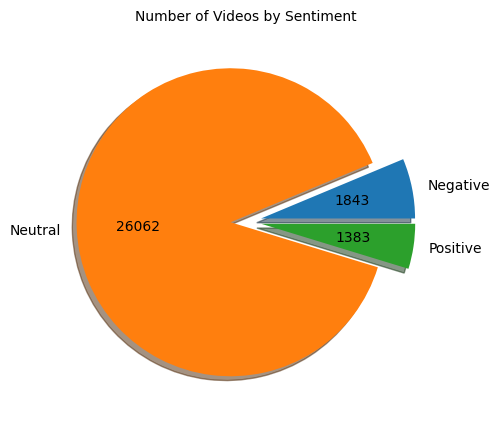

In [114]:
# pie chart

import matplotlib.pyplot as plt
%matplotlib inline

sentiment = gamingData["sentiment"].unique()
frequency = gamingData.groupby("sentiment")["sentiment"].count()

plt.figure(figsize=(5,5))

plt.pie(frequency, explode=(0.1,0.1,0.1),
        labels=frequency.index, autopct=lambda p: '{:.0f}'.format((p/100)*frequency.sum()),
        shadow=True,textprops={'fontsize': 10})

plt.title("Number of Videos by Sentiment",fontsize=10)

plt.show()


#### 6.3 Videos with Positive Sentiment

In [115]:
# Videos with positive Sentiment

positiveVideos_df = gamingData.loc[gamingData["sentiment"] == "Positive"]
positiveVideos_df

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,polarity_Score,sentiment
74,WS18WGCUSng,Apex Legends Season 6 – Battle Pass Trailer,2020-08-17T15:00:07Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-18T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,1934264,97629,1278,9059,https://i.ytimg.com/vi/WS18WGCUSng/default.jpg,False,False,Grab the Battle Pass and complete challenges t...,1.0,Positive
86,WS18WGCUSng,Apex Legends Season 6 – Battle Pass Trailer,2020-08-17T15:00:07Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-19T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2055160,99646,1350,9249,https://i.ytimg.com/vi/WS18WGCUSng/default.jpg,False,False,Grab the Battle Pass and complete challenges t...,1.0,Positive
98,bmnSitmxk8c,Welcome to Jurassic World!,2020-08-18T17:00:16Z,UC1sELGmy5jp5fQUugmuYlXQ,Minecraft,20,2020-08-20T00:00:00Z,minecraft|jurassic park|jurassic world|mojang ...,1397018,92832,1990,12212,https://i.ytimg.com/vi/bmnSitmxk8c/default.jpg,False,False,The Park is open! Manage the dinosaur resort o...,0.8,Positive
102,WS18WGCUSng,Apex Legends Season 6 – Battle Pass Trailer,2020-08-17T15:00:07Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-20T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2103631,100416,1394,9350,https://i.ytimg.com/vi/WS18WGCUSng/default.jpg,False,False,Grab the Battle Pass and complete challenges t...,1.0,Positive
110,Cj6AUuRs1A4,PlayStation 5 – Play Has No Limits,2020-08-20T12:57:24Z,UC-2Y8dQb0S6DtpxNgAKoJKA,PlayStation,20,2020-08-21T00:00:00Z,PS5|haptic feedback|adaptive triggers|3d audio...,1541984,77427,3258,8141,https://i.ytimg.com/vi/Cj6AUuRs1A4/default.jpg,False,False,https://www.playstation.com/en-us/ps5/Welcome ...,0.8,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29055,8cCrO6Md4x0,An Honest Review of The KSI Boxing Event....,2022-08-30T14:00:03Z,UCzfVmyl18x2TTaWp0d5rBNQ,MiniminterClips,20,2022-09-03T00:00:00Z,miniminter|mm7games|miniminterclips|simon|side...,971025,43146,0,976,https://i.ytimg.com/vi/8cCrO6Md4x0/default.jpg,False,False,Twitch: https://www.twitch.tv/miniminterInstag...,0.6,Positive
29097,tg33uA1Jj7c,Wish me luck — Drone Age update teaser / War T...,2022-09-01T19:40:13Z,UCPZsNertSS82YCT2qX9-wHA,War Thunder. Official channel.,20,2022-09-04T00:00:00Z,war thunder|wt|war thunder update|war thunder ...,415970,33031,0,4640,https://i.ytimg.com/vi/tg33uA1Jj7c/default.jpg,False,False,Drone Age update introduces legendary soviet s...,1.0,Positive
29108,8cCrO6Md4x0,An Honest Review of The KSI Boxing Event....,2022-08-30T14:00:03Z,UCzfVmyl18x2TTaWp0d5rBNQ,MiniminterClips,20,2022-09-04T00:00:00Z,miniminter|mm7games|miniminterclips|simon|side...,988321,43640,0,990,https://i.ytimg.com/vi/8cCrO6Md4x0/default.jpg,False,False,Twitch: https://www.twitch.tv/miniminterInstag...,0.6,Positive
29153,tg33uA1Jj7c,Wish me luck — Drone Age update teaser / War T...,2022-09-01T19:40:13Z,UCPZsNertSS82YCT2qX9-wHA,War Thunder. Official channel.,20,2022-09-05T00:00:00Z,war thunder|wt|war thunder update|war thunder ...,442394,34218,0,4726,https://i.ytimg.com/vi/tg33uA1Jj7c/default.jpg,False,False,Drone Age update introduces legendary soviet s...,1.0,Positive


##### 6.3.1 Top 10 Channels with Positive Sentiment

In [116]:
# Top 10 Channels with Positve Sentiment

positiveDF = positiveVideos_df["channelTitle"].value_counts().head(10).rename_axis('channelTitle').reset_index(name='No. of Videos with Positive Sentiment')
positiveDF

,channelTitle,No. of Videos with Positive Sentiment
0,SSundee,285
1,Apex Legends,39
2,The Official Pokémon YouTube channel,33
3,TommyInnit,24
4,League of Legends,21
5,MythrodakTV,20
6,Nintendo,19
7,PlayStation Access,18
8,Alpharad,18
9,Flamingo,16


In [117]:
# Export Dataframe to CSV
positiveDF.to_csv("Top10Channels_Positive.csv",index=False)

#### 6.4 Videos with Negative Sentiment

In [118]:
# Videos with negative Sentiment

negativeVideos_df = gamingData.loc[gamingData["sentiment"] == "Negative"]
negativeVideos_df

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,polarity_Score,sentiment
221,RkID8_gnTxw,"K/DA - THE BADDEST ft. (G)I-DLE, Bea Miller, W...",2020-08-27T19:00:09Z,UC2t5bjwHdUX4vM2g8TRDq5g,League of Legends,20,2020-08-28T00:00:00Z,Riot Games|Riot|League of Legends|League|LoL|M...,7027647,669490,22912,38264,https://i.ytimg.com/vi/RkID8_gnTxw/default.jpg,False,False,Follow @KDA_MUSIC on Twitter and Instagram for...,-0.5,Negative
247,RkID8_gnTxw,"K/DA - THE BADDEST ft. (G)I-DLE, Bea Miller, W...",2020-08-27T19:00:09Z,UC2t5bjwHdUX4vM2g8TRDq5g,League of Legends,20,2020-08-29T00:00:00Z,Riot Games|Riot|League of Legends|League|LoL|M...,10279271,780166,26437,43950,https://i.ytimg.com/vi/RkID8_gnTxw/default.jpg,False,False,Follow @KDA_MUSIC on Twitter and Instagram for...,-0.5,Negative
274,RkID8_gnTxw,"K/DA - THE BADDEST ft. (G)I-DLE, Bea Miller, W...",2020-08-27T19:00:09Z,UC2t5bjwHdUX4vM2g8TRDq5g,League of Legends,20,2020-08-30T00:00:00Z,Riot Games|Riot|League of Legends|League|LoL|M...,12016332,828312,27606,46288,https://i.ytimg.com/vi/RkID8_gnTxw/default.jpg,False,False,Follow @KDA_MUSIC on Twitter and Instagram for...,-0.5,Negative
297,RkID8_gnTxw,"K/DA - THE BADDEST ft. (G)I-DLE, Bea Miller, W...",2020-08-27T19:00:09Z,UC2t5bjwHdUX4vM2g8TRDq5g,League of Legends,20,2020-08-31T00:00:00Z,Riot Games|Riot|League of Legends|League|LoL|M...,13109032,850736,28094,47442,https://i.ytimg.com/vi/RkID8_gnTxw/default.jpg,False,False,Follow @KDA_MUSIC on Twitter and Instagram for...,-0.5,Negative
318,RkID8_gnTxw,"K/DA - THE BADDEST ft. (G)I-DLE, Bea Miller, W...",2020-08-27T19:00:09Z,UC2t5bjwHdUX4vM2g8TRDq5g,League of Legends,20,2020-09-01T00:00:00Z,Riot Games|Riot|League of Legends|League|LoL|M...,13619065,872905,28525,48239,https://i.ytimg.com/vi/RkID8_gnTxw/default.jpg,False,False,Follow @KDA_MUSIC on Twitter and Instagram for...,-0.5,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29220,9bdHZO5jiEY,I Built this in Vanilla Minecraft Hardcore?!,2022-09-03T11:46:47Z,UCIYI7DDUMDgJLODyyjM2SWQ,LockDownLife,20,2022-09-07T00:00:00Z,Minecraft|minecraft hardcore|hardcore minecraf...,375279,18144,0,1704,https://i.ytimg.com/vi/9bdHZO5jiEY/default.jpg,False,False,I Built this Insane Minecraft Illusion in Hard...,-1.0,Negative
29226,qwIjKTrhPjg,The most insane Rocket League freestyle challe...,2022-09-02T19:33:22Z,UC1GFqqHIBaiCW1ivJJCFTvg,amustycow,20,2022-09-07T00:00:00Z,Rocket League Musty Flick|Musty Flick Rocket L...,269563,14620,0,845,https://i.ytimg.com/vi/qwIjKTrhPjg/default.jpg,False,False,This video is sponsored by GFuel: https://gfue...,-1.0,Negative
29260,K0WEkjrnJww,Dropping Players Through The World…,2022-09-05T15:00:20Z,UCk2uxbWi5py_iJXaEsh2YRA,Spoke,20,2022-09-08T00:00:00Z,spoke|spokeishere|lifesteal|minecraft,637547,21974,0,886,https://i.ytimg.com/vi/K0WEkjrnJww/default.jpg,False,False,I dropped streamers through the Minecraft worl...,-0.5,Negative
29278,9bdHZO5jiEY,I Built this in Vanilla Minecraft Hardcore?!,2022-09-03T11:46:47Z,UCIYI7DDUMDgJLODyyjM2SWQ,LockDownLife,20,2022-09-08T00:00:00Z,Minecraft|minecraft hardcore|hardcore minecraf...,429326,19463,0,1793,https://i.ytimg.com/vi/9bdHZO5jiEY/default.jpg,False,False,I Built this Insane Minecraft Illusion in Hard...,-1.0,Negative


##### 6.4.1 Top 10 Channels with Negative Sentiment

In [119]:
# Top 10 Channels with Negative Sentiment

negativeDF = negativeVideos_df["channelTitle"].value_counts().head(10).rename_axis('channelTitle').reset_index(name='No. of Videos with Negative Sentiment')
negativeDF

,channelTitle,No. of Videos with Negative Sentiment
0,GoodTimesWithScar,64
1,Grian,44
2,FitMC,33
3,MrBeast Gaming,31
4,Dead by Daylight,29
5,Mumbo Jumbo,28
6,SmallAnt,27
7,Cinemassacre,25
8,SAD-ist,25
9,Mysticat,24


In [120]:
# Export DataFrame to CSV
negativeDF.to_csv("Top10Channels_Negative.csv",index=False)